In [1]:
import cv2
from pathlib import Path
from tqdm.notebook import tqdm
import numpy as np
import pandas as pd

data = {"Name": [], "Predicted": [], "Real": []}

LIMIT = 0.6

NAME = "nano_random"

for file in tqdm([*(Path("all_labels/" + NAME + "/")).glob('*.txt')]):
    label = pd.read_csv(file, header = None, delimiter = " ", index_col=None)
    label = pd.DataFrame(label)
    
    lines = int((label[[5]] > LIMIT).sum())

    #roi = pd.read_csv("all_rois/" + file.stem + ".roi2")
    roi = pd.read_csv("../../data/all_rois/" + file.stem + ".roi2")
    
    data["Name"].append(file.stem)
    data["Predicted"].append(lines)
    data["Real"].append(len(roi) + 1)
    
df = pd.DataFrame(data)
df.to_csv("all_csv/nano-spikelets-yolo.csv", index=False, sep=";")

  0%|          | 0/313 [00:00<?, ?it/s]

In [2]:
import json
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker

from sklearn.linear_model import LinearRegression
import numpy as np


manually = list(df["Real"])
automatically = list(df["Predicted"])

print(manually)
print(automatically)

maximum = max(max(manually), max(automatically))
minimum = min(min(manually), min(automatically))

x = np.array(automatically).reshape(-1,1)
y = np.array(manually).reshape(-1,1)

linreg = LinearRegression().fit(x,y)

[24, 11, 18, 11, 17, 18, 18, 18, 11, 9, 9, 24, 18, 9, 18, 10, 21, 18, 9, 10, 24, 22, 21, 20, 8, 14, 9, 19, 12, 9, 17, 9, 12, 9, 17, 21, 9, 22, 22, 14, 10, 9, 12, 10, 10, 21, 10, 10, 22, 19, 12, 18, 12, 19, 26, 22, 18, 21, 12, 10, 10, 11, 17, 18, 10, 21, 20, 19, 30, 8, 16, 19, 10, 10, 20, 10, 15, 22, 8, 9, 20, 21, 14, 13, 17, 12, 23, 23, 21, 22, 6, 20, 11, 18, 9, 23, 11, 18, 19, 18, 22, 14, 11, 21, 14, 22, 17, 12, 18, 18, 26, 23, 10, 6, 16, 20, 23, 10, 10, 20, 10, 20, 23, 21, 26, 18, 10, 8, 13, 11, 19, 19, 20, 18, 18, 10, 10, 20, 18, 17, 26, 10, 8, 11, 22, 24, 11, 16, 8, 11, 22, 10, 10, 21, 11, 11, 19, 9, 20, 29, 10, 21, 20, 18, 20, 11, 12, 18, 20, 9, 17, 11, 9, 10, 25, 20, 22, 21, 17, 19, 9, 21, 18, 18, 20, 20, 21, 22, 14, 11, 10, 23, 17, 12, 10, 24, 11, 20, 9, 9, 20, 9, 10, 18, 10, 10, 10, 23, 18, 20, 9, 18, 11, 26, 18, 20, 8, 11, 19, 12, 11, 11, 9, 19, 24, 18, 23, 20, 7, 23, 23, 21, 19, 19, 19, 12, 17, 9, 11, 23, 22, 19, 21, 16, 10, 8, 20, 12, 10, 13, 8, 11, 21, 21, 18, 10, 14, 20, 1

In [3]:
from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score

def RMSE(t, d):
    n = len(t)
    summa = 0
    for i in range(n):
        summa += (t[i] - d[i]) ** 2
    result = np.sqrt(summa / n)
    return result

def rRMSE(t, d):
    n = len(t)
    summa = 0
    for i in range(n):
        summa += ((t[i] - d[i]) / t[i]) ** 2
    result = np.sqrt(summa / n)
    return result

def R_squared(t, d):
    n = len(t)
    t_mean = np.mean(t)
    summa1 = 0
    summa2 = 0
    for i in range(n):
        summa1 += (t[i] - d[i]) ** 2
        summa2 +=  (t[i] - t_mean) ** 2
        #print(t[i] - d[i], t[i] - t_mean)
    result = 1 - summa1 / summa2
    return result

def MAE(t, d):
    n = len(t)
    summa = 0
    for i in range(n):
        summa += abs(t[i] - d[i])
    result = summa / n
    return result
    
def MAPE(t, d):
    n = len(t)
    summa = 0
    for i in range(n):
        summa += abs((t[i] - d[i]) / t[i])
    result = summa * 100 / n
    return result

rmse = RMSE(manually, automatically)
r_rmse = rRMSE(manually, automatically)
r_squared = R_squared(manually, automatically)
mae = MAE(manually, automatically)
mape = MAPE(manually, automatically)
#print(rmse, r_rmse, r_squared)


RMSE = 1.24
rRMSE = 9.64%
R^2 = 0.95
MAE = 0.68
MAPE = 4.87


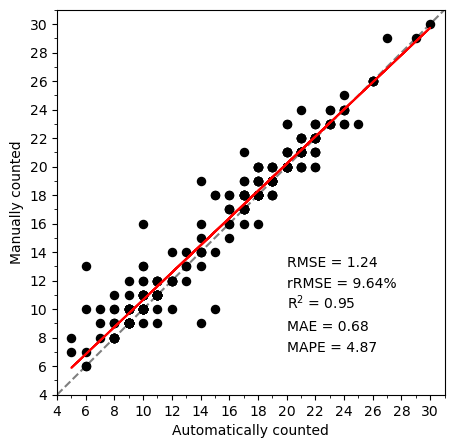

In [4]:
from matplotlib.figure import Figure

fig=plt.figure(figsize=(5,5))
ax = plt.gca()
ax.scatter(x, y, c="black", s=34)
plt.plot(np.linspace(minimum - 1, maximum + 1, num=5), np.linspace(minimum - 1, maximum + 1, num=5), linestyle='dashed', c='black', alpha=0.5)

plt.plot(x, linreg.intercept_ + linreg.coef_ * x, color='r')

ax.set_xlabel('Automatically counted')
ax.set_ylabel('Manually counted')

ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(1))

offset = 6

plt.text(20, 7+offset, f"RMSE = {round(rmse, 2)}", fontsize='medium')
plt.text(20, 5.5+offset, f"rRMSE = {round(r_rmse * 100, 2)}%", fontsize='medium')
plt.text(20, 4+offset, f"R$^2$ = {round(r_squared, 2)}", fontsize='medium')
plt.text(20, 2.5+offset, f"MAE = {round(mae, 2)}", fontsize='medium')
plt.text(20, 1+offset, f"MAPE = {round(mape, 2)}", fontsize='medium')

print(f"RMSE = {round(rmse, 2)}")
print(f"rRMSE = {round(r_rmse * 100, 2)}%")
print(f"R^2 = {round(r_squared, 2)}")
print(f"MAE = {round(mae, 2)}")
print(f"MAPE = {round(mape, 2)}")

plt.xlim(minimum - 1, maximum + 1)
plt.ylim(minimum - 1, maximum + 1)
plt.show()

In [5]:
fig.savefig('plots/' + NAME + '_' + str(LIMIT) + '.jpg', dpi=150)

In [6]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(manually, automatically)
rmse = np.sqrt(mse)

In [7]:
rmse

1.2447974802244592